University of California, Berkeley

DigHum 160 – Critical Digital Humanities 

Digital Hermeneutics: Close, Distant, Machine Reading

Instructor: Dr. Tom Van Nuenen

## **"Experience over Expertise? Truth-Finding/-Making in r/changemyview"**
By Teresa Görtz

### Supplementary Jupyter Notebook
Created by Teresa Görtz

August 16, 2019

In [43]:
import os
import pandas as pd
import nltk
from nltk.corpus import stopwords
from string import punctuation
punctuation
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA

In [7]:
pwd

'C:\\Users\\sprin\\Desktop\\DIGHUM160'

In [8]:
os.chdir('C:\\Users\\sprin\\Desktop\\DIGHUM160\\redditCMV')

In [9]:
submissionsDF = pd.read_csv("submissions.csv", lineterminator='\n')

In [10]:
submissionsDF.head(5)

,idint,idstr,created,self,nsfw,author,title,url,selftext,score,subreddit,distinguish,textlen,num_comments,flair_text,flair_css_class,augmented_at,augmented_count
0,71816829,t3_16ra7x,1358439851,1,0,RealHonestJohn,"CMV I think humanity is selfish, stupid, and s...",NaN,"proof: overpopulation, religion, wasting resou...",10,changemyview,NaN,134,13,NaN,NaN,NaN,NaN
1,71817317,t3_16ralh,1358440202,1,0,ancillarynipple,I think single people should get the most tax ...,NaN,Why should I pay higher taxes when I use less ...,15,changemyview,NaN,127,5,NaN,NaN,NaN,NaN
2,71842684,t3_16ru64,1358456133,1,0,[deleted],"I believe monogamy is false, please CMV!",NaN,"This is a reluctant belief of mine, so this su...",1,changemyview,NaN,412,0,NaN,NaN,NaN,NaN
3,71844272,t3_16rve8,1358457067,1,0,GrizzlyGremlin,"I believe monogamy is false, please CMV!",NaN,"This is a reluctant belief of mine, so this su...",23,changemyview,NaN,409,20,NaN,NaN,NaN,NaN
4,71850133,t3_16rzx1,1358460478,1,0,cardswsbound,I think the love of my life and I are doomed t...,NaN,I am atheist and she is Christian (not sure on...,11,changemyview,NaN,173,9,NaN,NaN,NaN,NaN


In [11]:
len(submissionsDF)

140377

Note: data in `submissionsDF` is from Tom's complete web scrape

### subsetting submissions to extract only submissions where OP acknowledged change of view by using flair `Delta(s) from OP`

In [12]:
DeltasFromOPdf = submissionsDF[submissionsDF['flair_text']=="Deltas(s) from OP"]

percentage of submissions with `Delta(s) from OP` compared to total number of submissions

In [13]:
100/len(submissionsDF)*len(DeltasFromOPdf)

4.837687085491213

description statistics for subset `Delta(s) from OP` and all submissions:

In [14]:
DeltasFromOPdf.describe()

,idint,created,self,nsfw,score,textlen,num_comments,augmented_at,augmented_count
count,6.791000e+03,6.791000e+03,6791.0,6791.000000,6791.000000,6791.000000,6791.000000,0.0,0.0
mean,6.047794e+08,1.542020e+09,1.0,0.004712,151.953026,1815.751436,85.108820,NaN,NaN
std,6.792788e+07,1.112195e+07,0.0,0.068488,714.929908,1518.183071,137.842466,NaN,NaN
min,4.968911e+08,1.522260e+09,1.0,0.000000,0.000000,9.000000,3.000000,NaN,NaN
25%,5.464126e+08,1.532384e+09,1.0,0.000000,0.000000,900.000000,28.500000,NaN,NaN
50%,5.958631e+08,1.541532e+09,1.0,0.000000,7.000000,1446.000000,48.000000,NaN,NaN
75%,6.536776e+08,1.550774e+09,1.0,0.000000,25.000000,2291.000000,86.000000,NaN,NaN
max,7.527110e+08,1.563749e+09,1.0,1.000000,21942.000000,21088.000000,2494.000000,NaN,NaN


In [15]:
submissionsDF.describe()

,idint,created,self,nsfw,score,textlen,num_comments,augmented_at,augmented_count
count,1.403770e+05,1.403770e+05,140377.000000,140377.000000,140377.000000,140377.000000,140377.000000,0.0,0.0
mean,3.559710e+08,1.473581e+09,0.997877,0.003391,37.633530,996.291287,37.839240,NaN,NaN
std,2.016997e+08,6.123071e+07,0.046026,0.058133,247.930225,1490.048442,87.369131,NaN,NaN
min,7.181683e+07,1.358440e+09,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,1.591703e+08,1.416400e+09,1.000000,0.000000,1.000000,9.000000,0.000000,NaN,NaN
50%,3.399863e+08,1.483726e+09,1.000000,0.000000,1.000000,443.000000,12.000000,NaN,NaN
75%,5.294158e+08,1.529026e+09,1.000000,0.000000,9.000000,1584.000000,42.000000,NaN,NaN
max,7.527644e+08,1.563756e+09,1.000000,1.000000,21942.000000,39788.000000,3348.000000,NaN,NaN


comparing `num_comments` statistics submissions in `DeltasFromOPdf` have generated a higher number of comments

### What are the most common topics in `DeltasfromOPdf` vs `submissionsDF` based on tf-idf?

In [16]:
DeltaTitles = DeltasFromOPdf['title'].tolist()

In [17]:
DeltaTitles = " ".join(DeltaTitles)

In [18]:
type(DeltaTitles)

str

In [19]:
submissionTitles = submissionsDF['title'].tolist()
submissionTitles = " ".join(submissionTitles)

In [20]:
corpus = [DeltaTitles, submissionTitles]

In [21]:
stop = stopwords.words("english")

In [22]:
type(stop)

list

In [23]:
additionalStops = ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would', 'cmv', "''", "``", "’", "”", "“"]

In [26]:
punctuationList = [char for char in punctuation]

In [27]:
for char in punctuationList:
    additionalStops.append(char)

In [28]:
for each in additionalStops:
    stop.append(each)

creating tfidf matrices for uni-, bi-,trigrams

In [29]:
tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize, stop_words=stop, max_features = 1000)

In [30]:
tfidf2 = TfidfVectorizer(tokenizer=nltk.word_tokenize, stop_words=stop, ngram_range=(2,3), max_features = 1000)

In [31]:
tfidf3 = TfidfVectorizer(tokenizer=nltk.word_tokenize, stop_words=stop, ngram_range=(3,4), max_features = 1000)

In [32]:
tfMatrix = tfidf.fit_transform(corpus)

In [33]:
tfMatrix

<2x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1987 stored elements in Compressed Sparse Row format>

In [34]:
tfMatrix2 = tfidf2.fit_transform(corpus)

In [35]:
tfMatrix2

<2x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1793 stored elements in Compressed Sparse Row format>

In [36]:
tfMatrix3 = tfidf3.fit_transform(corpus)

In [37]:
tfMatrix3

<2x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1373 stored elements in Compressed Sparse Row format>

plotting 30 most frequent uni-, bi-, trigrams:

In [38]:
dtm = pd.DataFrame(tfMatrix.toarray(), columns=tfidf.get_feature_names())

In [39]:
dtm = dtm.T.sort_values(0, ascending = False).head(100)

In [40]:
dtm.columns = ['DeltaTitles', 'SubmissionTitles']

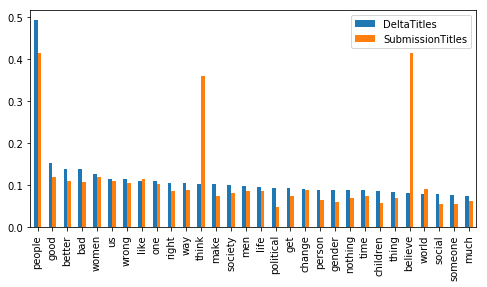

In [44]:
dtm.head(30).plot(kind='bar', figsize = (8,4))
plt.savefig('dtmplot', bbox_inches = "tight")

In [45]:
dtm2 = pd.DataFrame(tfMatrix2.toarray(), columns=tfidf2.get_feature_names())

In [46]:
dtm2 = dtm2.T.sort_values(0, ascending = False).head(100)

In [47]:
dtm2.columns = ['DeltaTitles', 'SubmissionTitles']

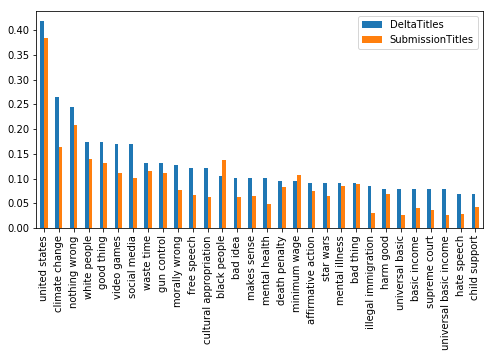

In [48]:
dtm2.head(30).plot(kind='bar', figsize = (8,4))
plt.savefig('dtm2plot', bbox_inches = "tight")

In [49]:
dtm3 = pd.DataFrame(tfMatrix3.toarray(), columns=tfidf3.get_feature_names())

In [50]:
dtm3 = dtm3.T.sort_values(0, ascending = False).head(100)

In [51]:
dtm3.columns = ['DeltaTitles', 'SubmissionTitles']

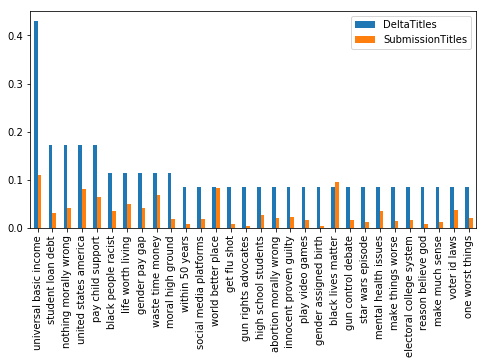

In [52]:
dtm3.head(30).plot(kind='bar', figsize = (8,4))
plt.savefig('dtm3plot', bbox_inches = "tight")

In [53]:
DeltaTitles = DeltasFromOPdf['title'].tolist()

In [54]:
for each in DeltaTitles:
    if 'universal basic income' in each.lower():
        print(each)

CMV: Universal Basic Income (UBI) is necessary to offset the effects of automation
CMV: Automation Taking All/Most of our Jobs Cannot Happen in a Capitalist Economy Without Universal Basic Income
CMV: UBI (Universal Basic Income) should not be implemented...
CMV: Universal Basic Income is not supportable by any country after a significant amount of time (ten years or so) because they run out of money.
CMV: Expanding the Earned Income Tax Credit is better than implementing a universal basic income
CMV: Universal Basic Income and a more socialist overall society (free healthcare/college) is actually better for spurring innovation.
CMV: Universal Basic Income is the only plausible solution that has a chance in eradicating poverty
CMV: liquidating all social welfare programs and instead establishing a universal basic income is far more efficient and ethical use of Tax Dollars (US Specific)
CMV: If we're gonna implement Universal Basic Income, we should implement VAT and send that directly 

In [57]:
for each in DeltaTitles:
    if 'student loan debt' in each.lower():
        print(each)

CMV: Bankruptcy Laws in the United States should be Amended to Permit the Discharge of Student Loan Debt Five Years After Graduation For Government Guaranteed Loans and Immediately for Private, Non-Government Guaranteed Loans
CMV: A program of suspending income tax and instead giving a chunk of pay to the department of education would greatly aid if not reverse student loan debt
CMV: The US government shouldn’t provide student loan debt relief to citizens
CMV: Student loans are no different from other loans and those with student loan debt do not deserve special sympathy or accomodation.
CMV: Student loan debt shouldn’t be forgiven and graduates are guilty for putting themselves into debt
CMV: The United States should not cancel student loan debt


In [58]:
for each in DeltaTitles:
    if 'nothing' in each.lower() and 'morally wrong' in each.lower():
        print(each)

CMV: There is nothing morally wrong with incest.
CMV: There is nothing morally wrong with prostitution.
CMV: There is nothing morally wrong about countries not accepting refugees/middle eastern/muslim immigrants
CMV: There is nothing morally wrong with prison labor and if anything we should take advantage of it
CMV: There's nothing morally wrong with making illegal immigration so dangerous that people die making the trip.
CMV: There is nothing morally wrong with abortion.


In [59]:
#for each in DeltaTitles:
#    if 'pay child support' in each.lower():
#        print(each)

In [60]:
#for each in DeltaTitles:
#    if 'gender pay gap' in each.lower():
#        print(each)

In [61]:
CMVubiIsNecessary = DeltasFromOPdf.loc[DeltasFromOPdf['title'] == 'CMV: Universal Basic Income (UBI) is necessary to offset the effects of automation']
CMVubiIsNecessary

,idint,idstr,created,self,nsfw,author,title,url,selftext,score,subreddit,distinguish,textlen,num_comments,flair_text,flair_css_class,augmented_at,augmented_count
100324,505912467,t3_8d7gk3,1524072497,1,0,Kyles39,CMV: Universal Basic Income (UBI) is necessary...,NaN,I was reading up on warehouse work recently du...,20,changemyview,NaN,1623,93,Deltas(s) from OP,OPdelta,NaN,NaN


In [62]:
values = CMVubiIsNecessary.values
#values

### finding corresponding comments: turns out that there is a problem with the comments data set because some comments cannot be matched to their parent submissions.

In [54]:
pwd

'C:\\Users\\sprin\\Desktop\\DIGHUM160\\redditCMV'

In [57]:
commentsDF = pd.read_csv('comments.csv', encoding = 'utf-8')

In [210]:
commentsDF.head(3)

,idint,idstr,created,author,parent,submission,body,score,subreddit,distinguish,textlen
0,26602800824,t1_c7ymchk,1358441654,Thompson_S_Sweetback,t3_16ralh,t3_16ralh,1. Long term economic disincentives will not b...,15.0,changemyview,NaN,696.0
1,26602813875,t1_c7ymmk3,1358442499,Jaberkaty,t1_c7ymchk,t3_16ralh,Excellent points. I would only add that most g...,6.0,changemyview,NaN,262.0
2,26602827369,t1_c7ymwyx,1358443385,ancillarynipple,t1_c7ymchk,t3_16ralh,Where can you provide the data that people wit...,2.0,changemyview,NaN,435.0


In [253]:
#commentsDF.sort_values(by='created')

In [254]:
#for s in commentsDF.created.unique():
#    if s == "changemyview":
#        print(s)

In [252]:
#commentsDF.loc[commentsDF['created'] == 'changemyview']

In [63]:
commentsDF.loc[commentsDF['parent'] == 't3_av5k2e']

,idint,idstr,created,author,parent,submission,body,score,subreddit,distinguish,textlen


In [65]:
commentsDF.loc[commentsDF['parent'] == 't3_9jwnkg']

,idint,idstr,created,author,parent,submission,body,score,subreddit,distinguish,textlen
